# Example #16 Analysis

- Target: Si

- Process: scattering

- Description: Spin independent valence to conduction transition for \( 2x2x2 \) calculation. Example calculation for user manual.

## Packages

Processing c:\users\tanner\exceed-dm_light
  Created wheel for EXCEED-DM-light: filename=EXCEED_DM_light-1.0.0-py3-none-any.whl size=25661 sha256=67074c848509b5b5d364988072bac5f6a09e15d433b2b8c413ae5e213ac6fb50
  Stored in directory: c:\users\tanner\appdata\local\pip\cache\wheels\61\f7\7a\72149c39ba76cb2c25cd55045a16731378d45d06e2214b92ca
Successfully built EXCEED-DM-light
  Attempting uninstall: EXCEED-DM-light
    Found existing installation: EXCEED-DM-light 1.0.0
    Uninstalling EXCEED-DM-light-1.0.0:
      Successfully uninstalled EXCEED-DM-light-1.0.0


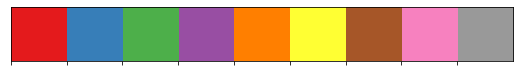

In [15]:
# Note: this line will be removed once EXCEED-DM_light can be pip installed.
! cd "C:/Users/Tanner/EXCEED-DM_light/" && python -m pip install .

import EXCEED_DM_light as exdm
import numpy as np

%run "../../../utilities/post_analysis/plotter.ipynb"

## Data

In [16]:
data = exdm.Data('../output/EXDMout_16.hdf5')

log10_mX = np.log10(data.masses_MeV())
log10_reach_light  = np.log10(data.scatter_sigma_constraint(2.))

log10_binned_rate_E = np.log10(data.scatter_binned_rate(10.**9, 2.))

## Plots

### Reach

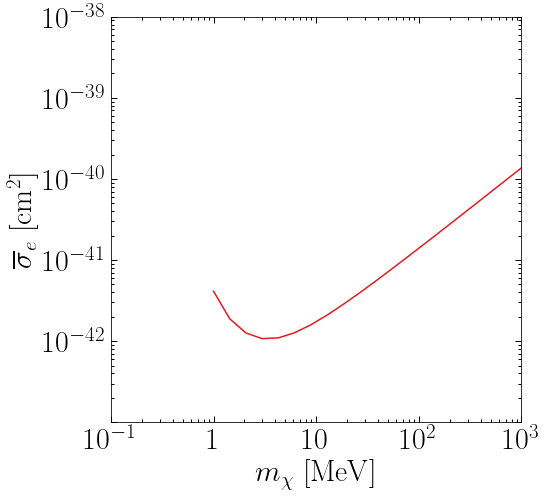

In [19]:
save_fig = True

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(7*1.1, 7))

# axes
log10_mX_min = -1
log10_mX_max = 3

log10_sigma_min = -43
log10_sigma_max = -38

set_custom_tick_options(axes)
axes.set_xlim(log10_mX_min, log10_mX_max)
axes.set_ylim(log10_sigma_min, log10_sigma_max)
set_log_xticks(axes, log10_mX_min, log10_mX_max)
set_log_yticks(axes, log10_sigma_min, log10_sigma_max, show_first = False)

axes.set_xlabel(r'$m_\chi$ $[\mathrm{MeV}]$', fontsize = 30)
axes.set_ylabel(r'$\overline{\sigma}_e$ $[ \mathrm{cm}^2 ]$', fontsize = 30)

# plot

axes.plot(
    log10_mX,
    log10_reach_light,
    color = color_list_disc[0]
)

fig.tight_layout()
    
if save_fig:
    plt.savefig('./ex_16_light_reach.pdf', 
                bbox_inches='tight', pad_inches = 0.075)

plt.show()

### Binned Rate